<a href="https://colab.research.google.com/github/KhanSmiley/Data-Science/blob/main/h1n1_vaccine_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/h1n1_vaccine_prediction.csv")

In [ ]:
data.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [ ]:
### Problem Statemnt ->  https://www.kaggle.com/competitions/prediction-of-h1n1-vaccination/data
### Dependent Variable : h1n1_vaccine
data.shape

(26707, 37)

In [ ]:
data.shape

(26707, 34)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [ ]:
data.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [ ]:
data.describe()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000


In [ ]:
#keeping 250 as threshold for null values, beyond that dropping
data=data.drop(['dr_recc_h1n1_vacc','dr_recc_seasonal_vacc','chronic_medic_condition','cont_child_undr_6_mnths','is_health_worker','has_health_insur','qualification','is_seas_vacc_effective','sick_from_h1n1_vacc','sick_from_seas_vacc','is_h1n1_vacc_effective','is_h1n1_risky','is_seas_risky'],axis=1)

In [ ]:
data=pd.get_dummies(data,columns=['age_bracket','race','sex','income_level','marital_status','housing_status','employment','census_msa'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 37 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   unique_id                               26707 non-null  int64  
 1   h1n1_worry                              26615 non-null  float64
 2   h1n1_awareness                          26591 non-null  float64
 3   antiviral_medication                    26636 non-null  float64
 4   contact_avoidance                       26499 non-null  float64
 5   bought_face_mask                        26688 non-null  float64
 6   wash_hands_frequently                   26665 non-null  float64
 7   avoid_large_gatherings                  26620 non-null  float64
 8   reduced_outside_home_cont               26625 non-null  float64
 9   avoid_touch_face                        26579 non-null  float64
 10  no_of_adults                            26458 non-null  fl

In [ ]:
data.isnull().sum()

unique_id                                   0
h1n1_worry                                 92
h1n1_awareness                            116
antiviral_medication                       71
contact_avoidance                         208
bought_face_mask                           19
wash_hands_frequently                      42
avoid_large_gatherings                     87
reduced_outside_home_cont                  82
avoid_touch_face                          128
no_of_adults                              249
no_of_children                            249
h1n1_vaccine                                0
age_bracket_18 - 34 Years                   0
age_bracket_35 - 44 Years                   0
age_bracket_45 - 54 Years                   0
age_bracket_55 - 64 Years                   0
age_bracket_65+ Years                       0
race_Black                                  0
race_Hispanic                               0
race_Other or Multiple                      0
race_White                        

In [ ]:
m1=data['contact_avoidance'].mean()
data["contact_avoidance"].replace(np.nan,m1,inplace=True)

m2=data['antiviral_medication'].mean()
data["antiviral_medication"].replace(np.nan,m2,inplace=True)

m3=data['avoid_touch_face'].mean()
data["avoid_touch_face"].replace(np.nan,m3,inplace=True)

m4=data['no_of_adults'].mean()
data["no_of_adults"].replace(np.nan,m4,inplace=True)

m5=data['no_of_children'].mean()
data["no_of_children"].replace(np.nan,m5,inplace=True)

m6=data['h1n1_awareness'].mean()
data["h1n1_awareness"].replace(np.nan,m6,inplace=True)

m7=data['bought_face_mask'].mean()
data["bought_face_mask"].replace(np.nan,m7,inplace=True)

m8=data['wash_hands_frequently'].mean()
data["wash_hands_frequently"].replace(np.nan,m8,inplace=True)

m9=data['reduced_outside_home_cont'].mean()
data["reduced_outside_home_cont"].replace(np.nan,m9,inplace=True)

m9=data['avoid_large_gatherings'].mean()
data["avoid_large_gatherings"].replace(np.nan,m9,inplace=True)


m10=data['h1n1_worry'].mean()
data["h1n1_worry"].replace(np.nan,m10,inplace=True)


In [ ]:
data.isnull().sum()

unique_id                                 0
h1n1_worry                                0
h1n1_awareness                            0
antiviral_medication                      0
contact_avoidance                         0
bought_face_mask                          0
wash_hands_frequently                     0
avoid_large_gatherings                    0
reduced_outside_home_cont                 0
avoid_touch_face                          0
no_of_adults                              0
no_of_children                            0
h1n1_vaccine                              0
age_bracket_18 - 34 Years                 0
age_bracket_35 - 44 Years                 0
age_bracket_45 - 54 Years                 0
age_bracket_55 - 64 Years                 0
age_bracket_65+ Years                     0
race_Black                                0
race_Hispanic                             0
race_Other or Multiple                    0
race_White                                0
sex_Female                      

In [ ]:
duplicate=data.duplicated()
print(duplicate.sum())

0


<Axes: xlabel='h1n1_vaccine', ylabel='count'>

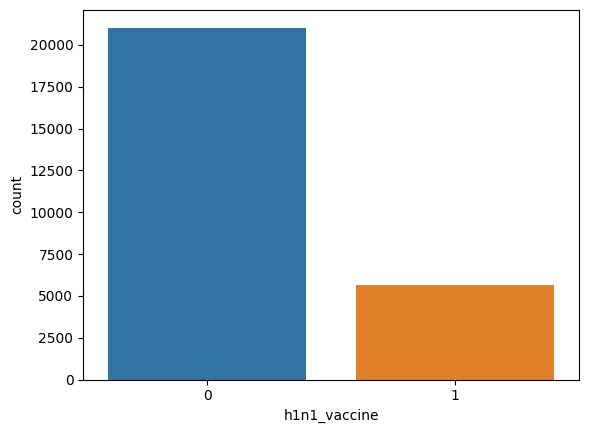

In [ ]:
sns.countplot(x="h1n1_vaccine",data=data)

In [ ]:
x=data.drop(['h1n1_vaccine'],axis=1)
y=data['h1n1_vaccine']

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.70,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
model.score(x_train, y_train)

0.7870974644270889

In [ ]:
model.score(x_test, y_test)

0.7885935355048047

In [ ]:
predictions=model.predict(x_test)

In [ ]:
predictions

0

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.7885935355048047

<Axes: >

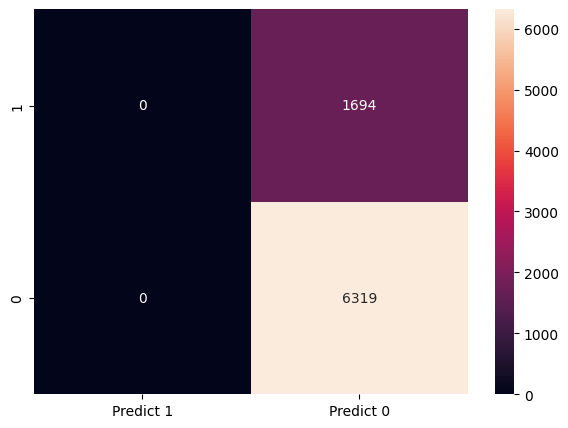

In [ ]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,predictions,labels=[1,0])
df_cm=pd.DataFrame(cm,index=[i for i in["1","0"]],
                  columns=[i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88     14692
           1       0.00      0.00      0.00      4003

    accuracy                           0.79     18695
   macro avg       0.39      0.50      0.44     18695
weighted avg       0.62      0.79      0.69     18695



In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model_dt=DecisionTreeClassifier(max_depth=3,criterion='entropy')
model_dt.fit(x_train,y_train)
print(model_dt.score(x_train,y_train))
print(model_dt.score(x_test,y_test))

0.7914378432351473
0.7858785771596684


In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
model_bag=BaggingClassifier(n_estimators=50,max_samples=3)
model_bag.fit(x_train,y_train)
print(model_bag.score(x_train,y_train))
print(model_bag.score(x_test,y_test))

0.7914378432351473
0.7858785771596684


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
model_Gboost=GradientBoostingClassifier(max_depth=3,n_estimators=10)
model_Gboost.fit(x_train,y_train)
print(model_Gboost.score(x_train,y_train))
print(model_Gboost.score(x_test,y_test))

0.7914378432351473
0.7858785771596684


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_rf=RandomForestClassifier(max_depth=3,max_features=4)
model_rf.fit(x_train,y_train)
print(model_rf.score(x_train,y_train))
print(model_rf.score(x_test,y_test))

0.7914378432351473
0.7858785771596684


In [ ]:
from sklearn.svm import SVC

In [ ]:
model_svm=SVC(kernel='rbf',C=3.0,gamma='scale')
model_svm.fit(x_train,y_train)
print(model_svm.score(x_train,y_train))
print(model_svm.score(x_test,y_test))

0.7914378432351473
0.7858785771596684


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)
print(knn.score(x_train,y_train))
print(knn.score(x_test,y_test))

0.7928107838242636
0.7814388874030489
